Source: https://www.kaggle.com/kabure/kickstarter-projects-eda-stat-tests-pipeline

In [1]:
#Load the Librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import plotly
import plotly.tools as tls
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

import warnings
from collections import Counter

%load_ext autoreload
%autoreload 2

In [2]:
ks = pd.read_csv('../../../datasets/ks-projects-201801.csv')
ks = ks.sample(1000, random_state=42).reset_index().drop('index', axis=1)

In [3]:
from utils import *
resumetable(ks)

Dataset Shape: (1000, 15)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,ID,int64,0,1000,1576537356,675907016,361890770,9.97
1,name,object,0,1000,Deko,"Westside BJ's: The Gluten-Free, Organic Food T...",Crepe Diem Food Truck,9.97
2,category,object,0,119,Hardware,Food Trucks,Food,6.12
3,main_category,object,0,15,Technology,Food,Food,3.53
4,currency,object,0,11,USD,USD,USD,1.20
5,deadline,object,0,819,2015-10-24,2015-02-01,2014-01-17,9.59
6,goal,float64,0,203,70000,250000,30000,6.12
7,launched,object,0,1000,2015-09-24 03:12:52,2015-01-02 20:55:07,2013-12-18 03:26:04,9.97
8,pledged,float64,0,645,1888,1466,5723,8.14
9,state,object,0,6,failed,failed,failed,1.53


In [4]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1576537356,Deko,Hardware,Technology,USD,2015-10-24,70000.0,2015-09-24 03:12:52,1888.0,failed,41,US,1888.00,1888.00,70000.00
1,675907016,"Westside BJ's: The Gluten-Free, Organic Food T...",Food Trucks,Food,USD,2015-02-01,250000.0,2015-01-02 20:55:07,1466.0,failed,9,US,1466.00,1466.00,250000.00
2,361890770,Crepe Diem Food Truck,Food,Food,USD,2014-01-17,30000.0,2013-12-18 03:26:04,5723.0,failed,90,US,5723.00,5723.00,30000.00
3,1225211551,Season's End - A horror novel ready for public...,Fiction,Publishing,GBP,2016-11-23,5500.0,2016-10-24 15:44:36,25.0,failed,2,GB,23.24,31.09,6839.01
4,2122944289,Colorado City Arizona Restaurant (Canceled),Restaurants,Food,USD,2015-05-13,30000.0,2015-03-14 05:18:34,100.0,canceled,3,US,100.00,100.00,30000.00


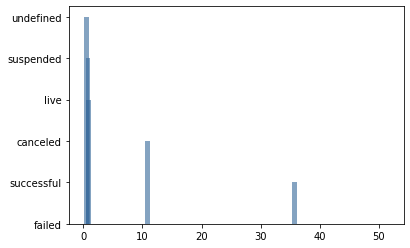

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

state = round(ks["state"].value_counts() / len(ks["state"]) * 100, 2)
labels = list(state.index)
values = list(state.values)

plt.bar(values, labels, color=(0.2, 0.4, 0.6, 0.6))
plt.show()

In [21]:
ks.groupby('state')['ID'].count()

state
canceled      109
failed        512
live            9
successful    357
suspended       8
undefined       5
Name: ID, dtype: int64

In [5]:
ks = ks.loc[ks['state'].isin(['failed','successful'])]

In [24]:
ks.groupby('state')['ID'].count()

state
failed        512
successful    357
Name: ID, dtype: int64

In [26]:
ks_failed = ks[ks.state == 'failed']
ks_successful = ks[ks.state == 'successful']

print(ks_failed.shape)
print(ks_successful.shape)

(512, 15)
(357, 15)


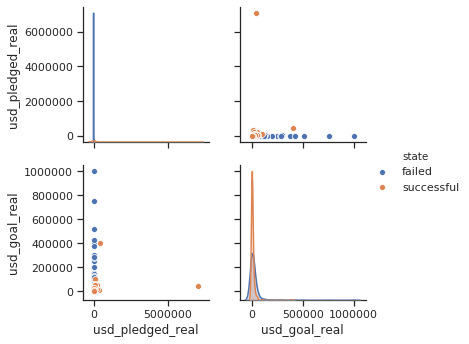

In [30]:
import seaborn as sns
sns.set(style='ticks')

sns.pairplot(ks[['usd_pledged_real', 'usd_goal_real', 'state']], hue='state')

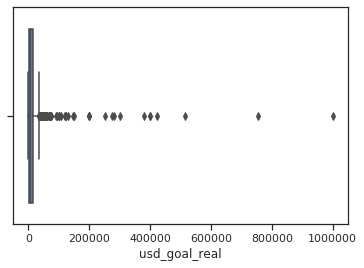

In [31]:
sns.boxplot(x=ks.usd_goal_real)

In [33]:
Q1 = ks.usd_goal_real.quantile(0.25)
Q3 = ks.usd_goal_real.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ks = ks[ks.usd_goal_real < IQR]

13000.0


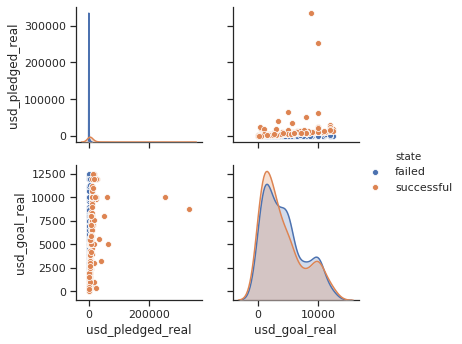

In [34]:
sns.pairplot(ks[['usd_pledged_real', 'usd_goal_real', 'state']], hue='state')

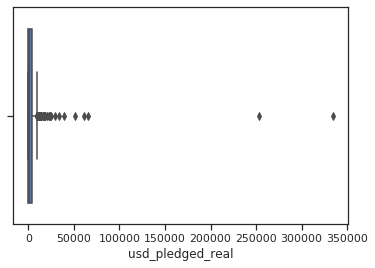

In [35]:
sns.boxplot(x=ks.usd_pledged_real)

In [36]:
Q1 = ks.usd_pledged_real.quantile(0.25)
Q3 = ks.usd_pledged_real.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ks = ks[ks.usd_pledged_real < IQR]

3671.7275


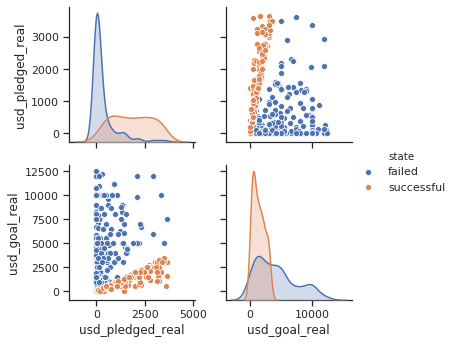

In [37]:
sns.pairplot(ks[['usd_pledged_real', 'usd_goal_real', 'state']], hue='state')

---

In [137]:
ks = pd.read_csv('../../../datasets/ks-projects-201801.csv')
ks = ks.sample(30000, random_state=42).reset_index().drop('index', axis=1)  # ~10%
ks.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1576537356,Deko,Hardware,Technology,USD,2015-10-24,70000.0,2015-09-24 03:12:52,1888.0,failed,41,US,1888.00,1888.00,70000.00
1,675907016,"Westside BJ's: The Gluten-Free, Organic Food T...",Food Trucks,Food,USD,2015-02-01,250000.0,2015-01-02 20:55:07,1466.0,failed,9,US,1466.00,1466.00,250000.00
2,361890770,Crepe Diem Food Truck,Food,Food,USD,2014-01-17,30000.0,2013-12-18 03:26:04,5723.0,failed,90,US,5723.00,5723.00,30000.00
3,1225211551,Season's End - A horror novel ready for public...,Fiction,Publishing,GBP,2016-11-23,5500.0,2016-10-24 15:44:36,25.0,failed,2,GB,23.24,31.09,6839.01
4,2122944289,Colorado City Arizona Restaurant (Canceled),Restaurants,Food,USD,2015-05-13,30000.0,2015-03-14 05:18:34,100.0,canceled,3,US,100.00,100.00,30000.00


In [138]:
ks = ks.query('state != "live"')  # drop rows with state=live
ks = ks.assign(outcome=(ks['state'] == 'successful').astype(int))  # create new feature outcome (=1 if successful, otherwise =0)
ks = ks.astype({'launched': 'datetime64', 'deadline': 'datetime64'})  # convert date columns to datetime
ks = ks.assign(campaign_time_days=(ks.deadline - ks.launched).apply(lambda x: x.days))  # add new feature measuring time (in days) between launch and deadline
cols2drop = ['ID', 'name', 'currency', 'goal', 'pledged', 'usd pledged', 'usd_pledged_real', 'backers', 'state', 'deadline', 'launched']
ks.drop(cols2drop, axis=1, inplace=True)  # drop some columns 

ks.head(5)

,category,main_category,country,usd_goal_real,outcome,campaign_time_days
0,Hardware,Technology,US,70000.00,0,29
1,Food Trucks,Food,US,250000.00,0,29
2,Food,Food,US,30000.00,0,29
3,Fiction,Publishing,GB,6839.01,0,29
4,Restaurants,Food,US,30000.00,0,59


In [100]:
ks.groupby('main_category').sum()

,backers,usd_pledged_real,usd_goal_real,outcome,campaign_time_days
main_category,,,,,
Art,97933,6794287.74,6.287892e+07,912,70550
Comics,113493,5493018.60,9.011640e+06,475,29311
Crafts,15932,989147.81,5.904058e+06,158,20195
Dance,11256,885024.23,2.031316e+06,185,9518
Design,523046,45387486.20,6.437828e+07,831,90738
Fashion,89634,8377797.11,2.654044e+07,412,57641
Film & Video,380201,33749094.03,2.079742e+08,1928,169376
Food,112479,10517111.94,6.123226e+07,519,64906
Games,1015228,67855924.31,2.287073e+08,1012,88485


In [101]:
resumetable(ks)

Dataset Shape: (29810, 10)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,category,object,0,158,Hardware,Food Trucks,Food,6.26
1,main_category,object,0,15,Technology,Food,Food,3.57
2,deadline,datetime64[ns],0,2886,2015-10-24 00:00:00,2015-02-01 00:00:00,2014-01-17 00:00:00,11.21
3,launched,datetime64[ns],0,29807,2015-09-24 03:12:52,2015-01-02 20:55:07,2013-12-18 03:26:04,14.86
4,backers,int64,0,1220,41,9,90,6.58
5,country,object,0,23,US,US,US,1.46
6,usd_pledged_real,float64,0,13973,1888,1466,5723,11.42
7,usd_goal_real,float64,0,7166,70000,250000,30000,8.54
8,outcome,int64,0,2,0,0,0,0.94
9,campaign_time_days,int64,0,92,29,29,29,3.80


## Vamos ver a distribuição de cada um dos atributos para com o resultado final (`outcome`)

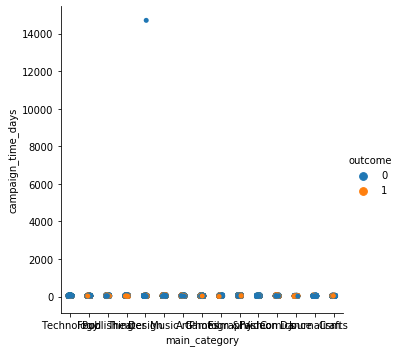

In [102]:
import seaborn as sns
sns.catplot(x='main_category', y='campaign_time_days', hue='outcome', data=ks)

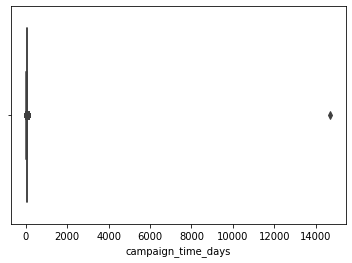

In [103]:
sns.boxplot(ks.campaign_time_days)

In [106]:
Q1 = ks.campaign_time_days.quantile(0.25)
Q3 = ks.campaign_time_days.quantile(0.75)
IQR = Q3 - Q1
highest = Q3 + 1.5 * IQR
print(IQR)
print(f"Qtd. de potenciais outliers: {(ks.campaign_time_days > highest).sum()} ")
print(f"Qtd. de potenciais outliers: {(ks.campaign_time_days <= highest).sum()} ")

7.0
Qtd. de outliers: 4017 
Qtd. de outliers: 25793 


In [110]:
ks_ctd_clean = ks[ks.campaign_time_days <= highest]  # kickstarter wo/ the potential outliers for campaign time

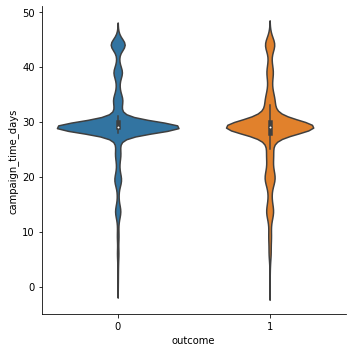

In [119]:
sns.catplot(x='outcome', y='campaign_time_days', kind='violin', data=ks_ctd_clean)

- Ao que parece, o tempo de campanha tem uma distribuição semelhante entre os `outcome`s.

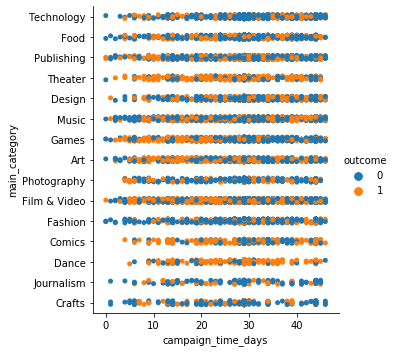

In [121]:
sns.catplot(x='campaign_time_days', y='main_category', hue='outcome', data=ks_ctd_clean)

In [123]:
resumetable(ks_ctd_clean)

Dataset Shape: (25793, 10)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,category,object,0,158,Hardware,Food Trucks,Food,6.26
1,main_category,object,0,15,Technology,Food,Food,3.58
2,deadline,datetime64[ns],0,2800,2015-10-24 00:00:00,2015-02-01 00:00:00,2014-01-17 00:00:00,11.15
3,launched,datetime64[ns],0,25791,2015-09-24 03:12:52,2015-01-02 20:55:07,2013-12-18 03:26:04,14.65
4,backers,int64,0,1176,41,9,90,6.70
5,country,object,0,23,US,US,US,1.47
6,usd_pledged_real,float64,0,12741,1888,1466,5723,11.48
7,usd_goal_real,float64,0,6398,70000,250000,30000,8.54
8,outcome,int64,0,2,0,0,0,0.96
9,campaign_time_days,int64,0,47,29,29,29,3.34


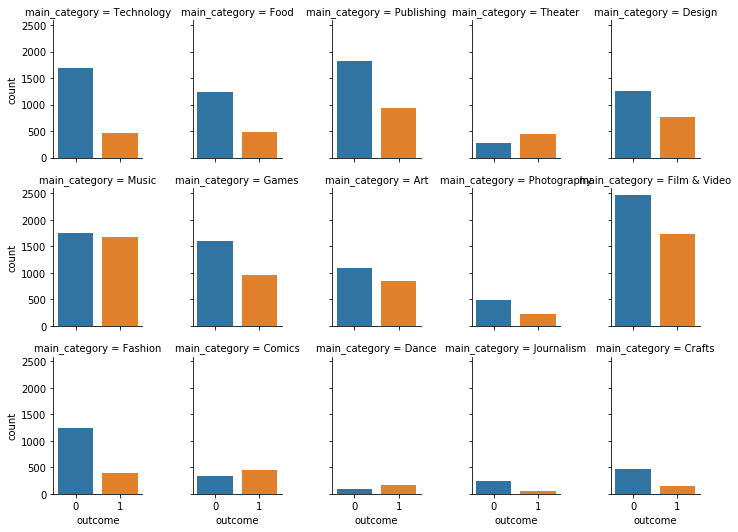

In [131]:
sns.catplot(x='outcome', col='main_category', col_wrap=5,
            data=ks_ctd_clean, kind='count', height=2.5, aspect=.8)